### Installing required libraries

In [ ]:
pip install neuralforecast==1.7.3 numpy==1.24.4  scikit-learn==1.3.2 matplotlib==3.7.1 pandas==2.1.4

Importing libraries

In [ ]:
import numpy as np
import pandas as pd
#import pytorch_lightning as pl
import matplotlib.pyplot as plt
from neuralforecast import NeuralForecast
from neuralforecast.models import TFT
from neuralforecast.losses.pytorch import MQLoss, DistributionLoss, GMM, PMM
from neuralforecast.tsdataset import TimeSeriesDataset
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

Create calculate error metrics function which helps in assessing the performance of the trained model

In [ ]:

def calculate_error_metrics(actual, predicted, num_predictors=1):
    # convert inputs are numpy arrays
    actual = np.array(actual)
    predicted = np.array(predicted)
    # Number of observations
    n = len(actual)
    # Calculate MSE
    mse = mean_squared_error(actual, predicted)
    # Calculate RMSE
    rmse = np.sqrt(mse)
    # Calculate MAPE
    mape = mean_absolute_percentage_error(actual, predicted)
    # Calculate R-squared
    r2 = r2_score(actual, predicted)
    # Calculate Adjusted R-squared
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - num_predictors - 1))
    print(f'MSE : {mse}')
    print(f'RMSE : {rmse}')
    print(f'MAPE : {mape}')
    print(f'r2 : {r2}')
    print(f'adjusted_r2 : {adjusted_r2}')

Load **AirPassenger** data set

In [ ]:
from neuralforecast.utils import AirPassengersDF as Y_df


Split data into **train** and **test**

In [ ]:

# To load local csv  > modify to the right path where the file is present
#Y_df = pd.read_csv('AirPassengersDataset.csv')
#Y_df = Y_df.reset_index(drop=True)
Y_train_df = Y_df[Y_df.ds<='1959-12-31'] # 132 train
Y_test_df = Y_df[Y_df.ds>'1959-12-31']   # 12 test
#Y_df.head()
dataset, *_ = TimeSeriesDataset.from_df(Y_train_df)

Lets initialize and training model (**TFT**) and define its hyperparameters.

In [ ]:
horizon =12
nf = NeuralForecast(
    models=[TFT(h=horizon, input_size=12,
                hidden_size=20,
                #loss=DistributionLoss(distribution='Poisson', level=[80, 90]),
                #loss=DistributionLoss(distribution='Normal', level=[80, 90]),
                loss=DistributionLoss(distribution='StudentT', level=[80, 90]),
                learning_rate=0.005,
                #stat_exog_list=['airline1'],
                #futr_exog_list=['y_[lag12]'],
                #hist_exog_list=['trend'],
                max_steps=500,
                val_check_steps=10,
                early_stop_patience_steps=10,
                scaler_type='robust',
                windows_batch_size=None,
                enable_progress_bar=True),
    ],
    freq='M'
)
nf.fit(df=Y_train_df,val_size=12)


INFO:lightning_fabric.utilities.seed:Seed set to 1
/usr/local/lib/python3.10/dist-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name                    | Type                     | Params | Mode 
-----------------------------------------------------------------------------
0 | loss                    | DistributionLoss         | 5      | train
1 | padder_train            | ConstantPad1d            | 0      | train
2 | scaler                  | TemporalNorm             | 0      | train
3 | embedding               | TFTEmbedding             | 80     | train
4 | static_encoder          | StaticCov

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predict for the next defined horizon

In [ ]:
Y_hat_df = nf.predict()

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:199: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
Y_hat_df

,ds,TFT,TFT-median,TFT-lo-90,TFT-lo-80,TFT-hi-80,TFT-hi-90
unique_id,,,,,,,
1.0,1960-01-31,409.735870,409.616211,375.497711,383.998932,435.490723,442.676880
1.0,1960-02-29,430.913940,430.234497,393.212128,401.173767,459.662262,470.078491
1.0,1960-03-31,459.308258,459.359070,420.979584,429.920593,489.938873,498.055145
1.0,1960-04-30,475.864502,476.793640,437.453857,447.124084,503.404755,510.801758
1.0,1960-05-31,481.939911,483.021790,450.313446,459.097778,505.097565,512.443787
1.0,1960-06-30,571.280396,571.271851,539.765015,546.291443,595.440002,602.799744
1.0,1960-07-31,645.581360,646.160217,611.791931,620.582825,671.494141,679.727905
1.0,1960-08-31,647.445862,647.359009,612.835510,621.401184,673.843018,682.711426
1.0,1960-09-30,560.992249,561.262817,532.675659,539.174194,582.520020,588.498352


Measure the models accuracy

In [ ]:
calculate_error_metrics(Y_test_df[['y']],Y_hat_df['TFT'])

MSE : 1292.798583984375
RMSE : 35.955509185791016
MAPE : 0.06823533028364182
r2 : 0.7666206296627686
adjusted_r2 : 0.7432826926290454


Visualize the predictions

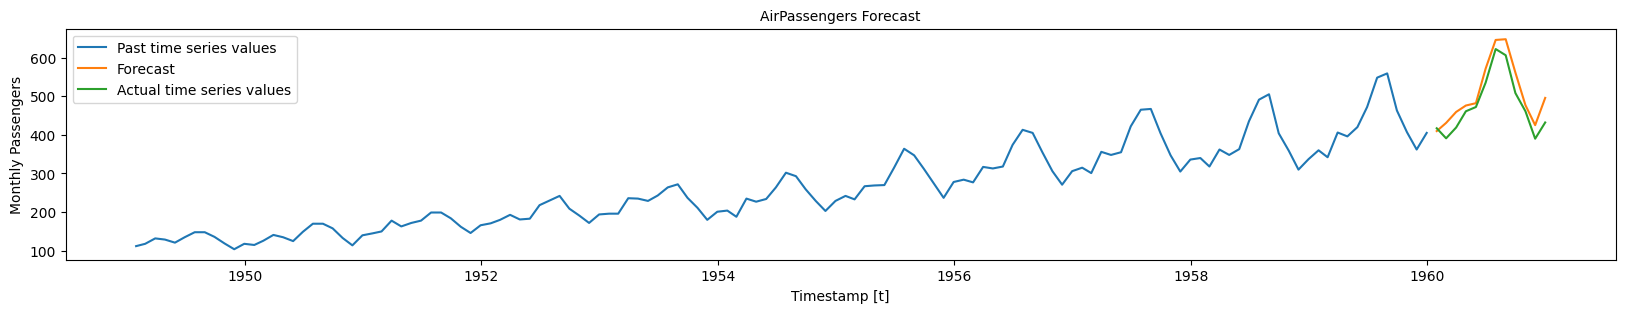

In [ ]:
Y_train_df.set_index('ds',inplace =True)
Y_hat_df.set_index('ds',inplace =True)
Y_test_df.set_index('ds',inplace =True)

plt.figure(figsize=(20, 3))

y_past = Y_train_df["y"]
y_pred = Y_hat_df['TFT']
y_test = Y_test_df["y"]

plt.plot(y_past, label="Past time series values")
plt.plot(y_pred, label="Forecast")
plt.plot(y_test, label="Actual time series values")
plt.title('AirPassengers Forecast', fontsize=10)
plt.ylabel('Monthly Passengers', fontsize=10)
plt.xlabel('Timestamp [t]', fontsize=10)

plt.legend();